# K-Means Clustering für Diamanten

K-Means ist ein iterativer Clustering-Algorithmus, der Daten in eine vordefinierte Anzahl von **k** Clustern unterteilt, indem er die Punkte basierend auf der Nähe zu den Clusterzentroiden gruppiert. Ziel ist es, die Summe der quadratischen Abstände zwischen den Punkten und ihren Zentroiden zu minimieren.


In [16]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px



In [3]:
# Daten laden und vorbereiten
# Daten laden
silent = True
%run ../dataLoadAndPrepare.ipynb

print("Features vor dem One-Hot-Encoding:")
display(df.head())  


print("Für das Clustering werden alle numerischen Features verwendet")

# Features für das Clustering


Features vor dem One-Hot-Encoding:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Für das Clustering werden alle numerischen Features verwendet


In [13]:
#Bestimmung der Anzahl der Cluster
# Elbow-Methode




# Vor k = 2 nimmt die Inertia sehr stark ab.
# Nach k = 3 wird die Reduktion kleiner, d. h., zusätzliche Cluster verbessern die Clustering-Qualität nicht mehr so stark.

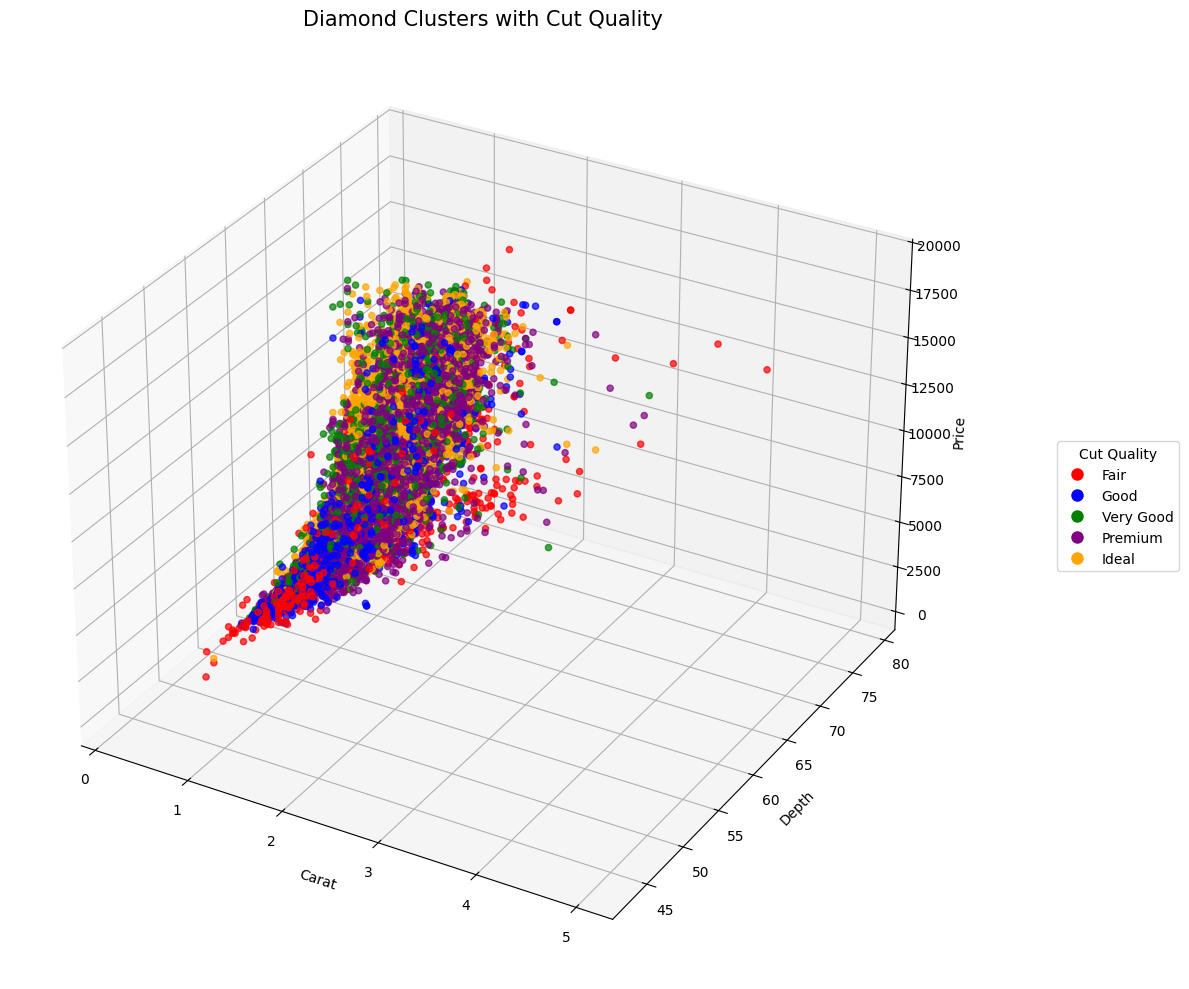


Cluster Characteristics:
            carat      depth         price  \
Cluster                                      
0        1.120720  61.200184   6055.607432   
1        0.449194  61.221739   1316.879765   
2        0.700805  63.285061   2608.331291   
3        1.773187  61.847224  13234.505768   

                                                       cut  
Cluster                                                     
0        {'Premium': 0.35789220789621207, 'Ideal': 0.35...  
1        {'Ideal': 0.5453047079705857, 'Premium': 0.245...  
2        {'Very Good': 0.3380707342971494, 'Good': 0.24...  
3        {'Premium': 0.3431867339581831, 'Ideal': 0.314...  

Cut Distribution per Cluster:


In [18]:
# Encode cut quality
le = LabelEncoder()
df['cut_encoded'] = le.fit_transform(df['cut'])

# Prepare features
features = ['carat', 'depth', 'price']
X = df[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)


# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Create color map for cuts
cut_colors = {'Fair': 'red', 'Good': 'blue', 'Very Good': 'green', 'Premium': 'purple', 'Ideal': 'orange'}

# 3D scatter plot
plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')

# Plot clusters with different colors
for cluster in range(4):
    cluster_data = df[df['Cluster'] == cluster]
    
    # Create a scatter plot for each cluster
    scatter = ax.scatter(
        cluster_data['carat'], 
        cluster_data['depth'], 
        cluster_data['price'], 
        c=cluster_data['cut'].map(cut_colors), 
        label=f'Cluster {cluster}',
        alpha=0.7
    )

ax.set_xlabel('Carat')
ax.set_ylabel('Depth')
ax.set_zlabel('Price')
ax.set_title('Diamond Clusters with Cut Quality', fontsize=15)

# Create custom legend for cut qualities
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                               label=cut, markerfacecolor=color, markersize=10)
                   for cut, color in cut_colors.items()]
ax.legend(handles=legend_elements, title='Cut Quality', 
          loc='center left', bbox_to_anchor=(1.1, 0.5))

plt.tight_layout()
plt.show()

# Print cluster characteristics
print("\nCluster Characteristics:")
cluster_summary = df.groupby('Cluster').agg({
    'carat': 'mean',
    'depth': 'mean',
    'price': 'mean',
    'cut': lambda x: x.value_counts(normalize=True).to_dict()
})
print(cluster_summary)

# Print cut distribution per cluster
print("\nCut Distribution per Cluster:")

Silhouette Score ranges from -1 to 1
A score around 0.37 indicates:

The clustering is moderately good
Clusters have some meaningful separation
There's room for improvement in the clustering algorithm or feature selection